In [23]:
import csv
import matplotlib.pyplot as plt 
from math import sqrt

In [24]:
with open('csv/pokemon.csv', newline='') as csv_pokemon:
    df_pokemon = csv.reader(csv_pokemon, delimiter=',')
    liste_pokemon=[]
    i=0
    for row in df_pokemon:
        if i>0 :
            liste_pokemon.append(row)
        i +=1
liste_pokemon= [[pokemon[0],int(pokemon[1]),int(pokemon[2]),pokemon[3]] for pokemon in liste_pokemon ]

In [25]:
liste_pokemon_eau = [pokemon_eau for pokemon_eau in liste_pokemon if pokemon_eau[3] == "Eau"]
liste_pokemon_eau = [[pokemon_eau[0],int(pokemon_eau[1]),int(pokemon_eau[2]),pokemon_eau[3]] for pokemon_eau in liste_pokemon_eau ]
liste_pokemon_eau = sorted(liste_pokemon_eau,key=lambda x:x[1] )

liste_pokemon_psy = [pokemon_psy for pokemon_psy in liste_pokemon if pokemon_psy[3] == "Psy"]
liste_pokemon_psy = [[pokemon_psy[0],int(pokemon_psy[1]),int(pokemon_psy[2]),pokemon_psy[3]] for pokemon_psy in liste_pokemon_psy ]
liste_pokemon_psy = sorted(liste_pokemon_psy,key=lambda x:x[1])


      

In [26]:
liste_pv_pkm_eau = [pokemon_eau[1] for pokemon_eau in liste_pokemon_eau]
liste_att_pkm_eau = [pokemon_eau[2] for pokemon_eau in liste_pokemon_eau]

liste_pv_pkm_psy = [pokemon_psy[1] for pokemon_psy in liste_pokemon_psy]
liste_att_pkm_psy = [pokemon_psy[2] for pokemon_psy in liste_pokemon_psy]


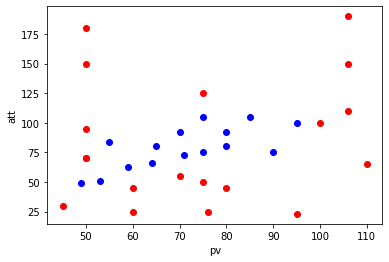

In [27]:
plt.plot(liste_pv_pkm_eau,liste_att_pkm_eau, 'ob')
plt.plot(liste_pv_pkm_psy,liste_att_pkm_psy, 'or')
plt.xlabel('pv')
plt.ylabel('att')
plt.show()   

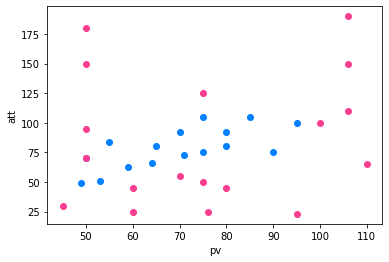

In [28]:
for pokemon in liste_pokemon_eau:
        plt.scatter(pokemon[1],pokemon[2], c='#0080ff')
for pokemon in liste_pokemon_psy:
        plt.scatter(pokemon[1],pokemon[2], c='#fd3d92')

plt.xlabel('pv')
plt.ylabel('att')
plt.show()   

In [29]:
def calculer_distance(coordonner_pkm_un,coordonner_pkm_deux):
    return sqrt((coordonner_pkm_un[0]-coordonner_pkm_deux[0])**2 +(coordonner_pkm_un[1]-coordonner_pkm_deux[1])**2)

def calculer_distance_chaque_elt(liste_pokemon,coordonne_point):
    liste_pokemon_et_distance=[[pokemon[0],pokemon[1],pokemon[2],pokemon[3],calculer_distance(pokemon[1:3],coordonne_point)] for pokemon in liste_pokemon]
    
    return liste_pokemon_et_distance
""" def calculer_distance_chaque_elt(liste_pokemon,coordonne_point):
    liste_pokemon_et_distance = []
    for pokemon in liste_pokemon:
        copy_pokemon = pokemon.copy()
        copy_pokemon.append(calculer_distance(pokemon[1:3],coordonne_point))
        liste_pokemon_et_distance.append(copy_pokemon)
        
    return liste_pokemon_et_distance """

def proche_voisin(liste_plus_distance,nb_voisin):
    liste_trois_voisin=[]
    for pokemon in liste_plus_distance:
        liste_trois_voisin.append(pokemon)
        liste_trois_voisin.sort(key=lambda x:x[4])
        if len(liste_trois_voisin) >nb_voisin :
            liste_trois_voisin.pop(-1)
    
    return liste_trois_voisin

In [30]:
import copy

def type_du_pkm_entre_eau_et_psy(liste_pokemon,coordonne_point,nb_voisin):
    copy_liste_pknm = copy.deepcopy(liste_pokemon)
    liste_pokemon_plus_distance = calculer_distance_chaque_elt(copy_liste_pknm,coordonne_point)
    liste_voisin = proche_voisin(liste_pokemon_plus_distance,nb_voisin)
    eau = 0
    psy = 0
    print(liste_voisin)
    for voisin in liste_voisin:
        if voisin[3] == 'Eau':
            eau +=1
        elif voisin[3] == 'Psy':
            psy +=1
    if   eau > psy :
        print("Votre pokemon est de type Eau")
    else :  
        print("Votre pokemon est de type Psy")

In [31]:

type_du_pkm_entre_eau_et_psy(liste_pokemon,[59,67],5)

[['Carabaffe', 59, 63, 'Eau', 4.0], ['Prinplouf', 64, 66, 'Eau', 5.0990195135927845], ['Gobou', 50, 70, 'Eau', 9.486832980505138], ['Deoxys', 50, 70, 'Psy', 9.486832980505138], ['Gamblast', 71, 73, 'Eau', 13.416407864998739]]
Votre pokemon est de type Eau
